<a href="https://colab.research.google.com/github/Kishan-Ved/Data-Narratives/blob/main/22110122_ES114_DN1_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import linalg

In [ ]:
books = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/books.csv")
# btags = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/book_tags.csv")
tr = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/to_read.csv")
# ratings = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")

In [ ]:
books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [ ]:
m = books["original_title"]
m2 = books["authors"]
m = pd.DataFrame(m)
m2 = pd.DataFrame(m2)
m.loc[:,["authors"]] = m2.loc[:,"authors"]
m.index = np.arange(1,10001)
m.columns = ["Book Title","Author(s)"]
print("5 most popular books and their authors:")
m.head()

5 most popular books and their authors:


,Book Title,Author(s)
1,The Hunger Games,Suzanne Collins
2,Harry Potter and the Philosopher's Stone,"J.K. Rowling, Mary GrandPré"
3,Twilight,Stephenie Meyer
4,To Kill a Mockingbird,Harper Lee
5,The Great Gatsby,F. Scott Fitzgerald


In [ ]:
l = books["language_code"].dropna()
l = pd.DataFrame(l.value_counts())
l.columns = ["Number of books"]
print("Language code and corresponding number of books :")
l

Language code and corresponding number of books :


,Number of books
eng,6341
en-US,2070
en-GB,257
ara,64
en-CA,58
fre,25
ind,21
spa,20
ger,13
per,7


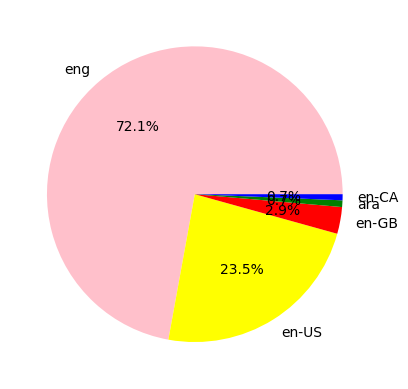

In [ ]:
l = books["language_code"].dropna().value_counts().head(5)
l = dict(l)
val = l.values()
names = l.keys()
plt.pie(val,labels=names,colors=['pink','yellow','red','green','blue'],autopct='%1.1f%%',)
plt.show()

In [ ]:
a = books["authors"].dropna()
a = pd.DataFrame(a).value_counts()
a = pd.DataFrame(a.head(5))
a.columns = ["Number of books"]
print("Top 5 authors (having the most books in this dataset)")
a

Top 5 authors (having the most books in this dataset)


,Number of books
authors,
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39


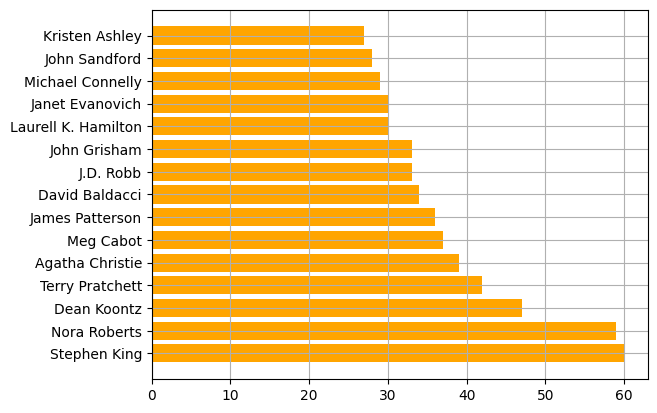

In [ ]:
a = books["authors"].dropna().value_counts().head(15)
a = dict(a)

plt.barh(list(a.keys()),list(a.values()),color = 'orange')
plt.grid()
plt.show()

In [ ]:
# e = books.loc[books["language_code"]=="eng"]["authors"]
# e = e.value_counts()
# e.head(5)

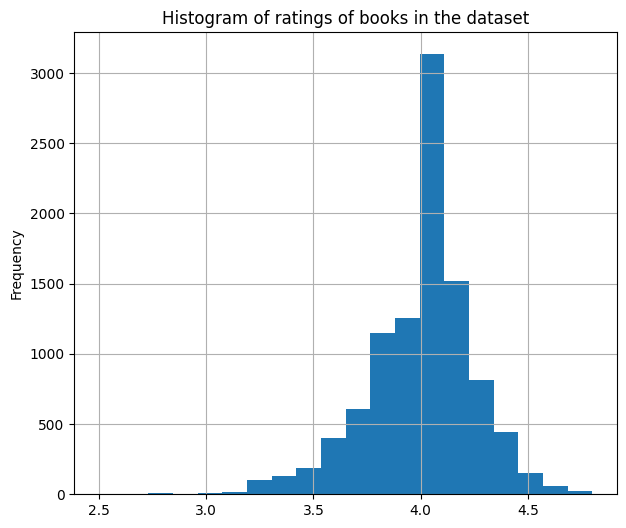

In [ ]:
r = books["average_rating"].astype(float)
r2 = round(r,1)
plt.figure(figsize=(7,6))
r2.plot(kind="hist",bins=20,title="Histogram of ratings of books in the dataset")
plt.grid()
plt.show()
# Press Shift + O to get the entire image without a scroller

In [ ]:
r.describe()

count    10000.000000
mean         4.002191
std          0.254427
min          2.470000
25%          3.850000
50%          4.020000
75%          4.180000
max          4.820000
Name: average_rating, dtype: float64

In [ ]:
max_rated = pd.DataFrame(books.loc[books["average_rating"]>=4.8].iloc[0,[7,9,12]])
max_rated.index = ["Author","Book Title","Rating"]
max_rated.columns = ["Highest Rated"]
max_rated

,Highest Rated
Author,Bill Watterson
Book Title,The Complete Calvin and Hobbes
Rating,4.82


In [ ]:
ratings = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/ratings.csv")

In [ ]:
print("User Id with maximum ratings and number of ratings:")
rr = ratings["user_id"].value_counts().head(10)
rr = pd.DataFrame(rr)
rr.columns = ['# of Ratings']
rr

User Id with maximum ratings and number of ratings:


,# of Ratings
12874,200
30944,200
52036,199
12381,199
28158,199
45554,197
6630,197
37834,196
15604,196
7563,196


In [ ]:
print("Analysis of user activity based on mean ratings per user and other factors: ")
ratings["user_id"].value_counts().describe()

Analysis of user activity based on mean ratings per user and other factors: 


count    53424.000000
mean       111.868804
std         26.071224
min         19.000000
25%         96.000000
50%        111.000000
75%        128.000000
max        200.000000
Name: user_id, dtype: float64

In [ ]:
x = pd.DataFrame(tr["book_id"].value_counts().head(5))
top_tr_id = tr["book_id"].value_counts().head(5).index
tr_df = pd.DataFrame([[None,None,None]]*5)
tr_df.columns = ["Book Title","Book Id","To Read Tags"]
tr_df.index = np.arange(1,6)
tr_df.iloc[:,1] = top_tr_id
for i in range(10000):
    b_id = books.iloc[i,0] 
    for j in range(5):
        if top_tr_id[j] == b_id:
            tr_df.iloc[j,0] = books.loc[i,"title"]
for i in range(5):
    tr_df.iloc[i,2] = x.iloc[i,0]
tr_df

C:\Users\manis\AppData\Local\Temp\ipykernel_22680\2714620950.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  tr_df.iloc[:,1] = top_tr_id


,Book Title,Book Id,To Read Tags
1,The Book Thief,47,2772
2,All the Light We Cannot See,143,1967
3,Catch-22,113,1840
4,1984,13,1812
5,The Kite Runner,11,1767


In [ ]:
tags = pd.read_csv("https://raw.githubusercontent.com/zygmuntz/goodbooks-10k/master/tags.csv")

In [ ]:
# y = books['original_publication_year'].dropna()
y = books.loc[books['original_publication_year']>1500]
y.describe()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,9929.000000,9.929000e+03,9.929000e+03,9.929000e+03,9929.000000,9.349000e+03,9929.000000,9929.000000,9.929000e+03,9.929000e+03,9929.000000,9929.000000,9929.000000,9929.000000,9.929000e+03,9.929000e+03
mean,5003.933629,5.293383e+06,5.501375e+06,8.679675e+06,73.467117,9.754863e+12,1991.566220,4.002017,5.402629e+04,5.970652e+04,2932.262262,1343.805721,3105.094269,11463.444456,1.998191e+04,2.381226e+04
std,2886.446443,7.590300e+06,7.842681e+06,1.177007e+07,164.916880,4.444173e+11,41.713327,0.254342,1.577449e+05,1.682026e+05,6143.244611,6651.089929,9723.137019,28570.472772,5.156739e+04,8.000712e+04
min,1.000000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,1513.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2506.000000,4.678700e+04,4.846400e+04,1.010054e+06,23.000000,9.780316e+12,1991.000000,3.850000,1.357000e+04,1.544300e+04,701.000000,196.000000,657.000000,3113.000000,5.416000e+03,5.328000e+03
50%,5010.000000,4.003540e+05,4.298830e+05,2.731250e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.114300e+04,2.381600e+04,1406.000000,391.000000,1162.000000,4894.000000,8.270000e+03,8.831000e+03
75%,7504.000000,9.436632e+06,9.681098e+06,1.455849e+07,66.000000,9.780832e+12,2011.000000,4.180000,4.103700e+04,4.586700e+04,2753.000000,885.000000,2353.000000,9272.000000,1.597900e+04,1.726800e+04
max,10000.000000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


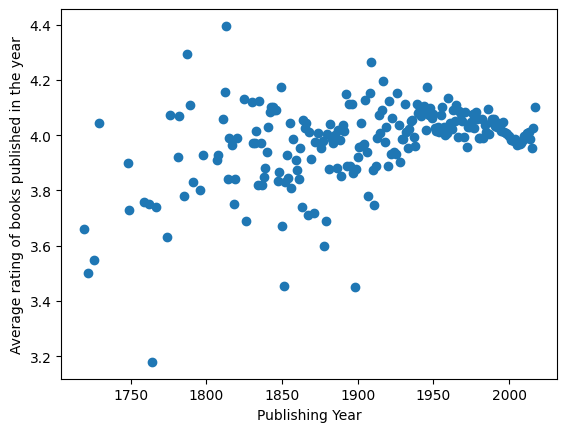

In [ ]:
yr = books['original_publication_year']
rat = books['average_rating']
d = {}
for i in range(10000):
    if yr[i] < 1700 or yr[i]=='nan':
        continue
    else:
        if yr[i] in d.keys():
            d[yr[i]][0] +=  rat[i]
            d[yr[i]][1] += 1
        else:
            d[yr[i]] = [rat[i],1]
            
            
d3 = {}
for year in d.keys():
    d3[year] = d[year][0]/d[year][1]
d3
plt.plot(d3.keys(),d3.values(),'o')
plt.xlabel("Publishing Year")
plt.ylabel("Average rating of books published in the year")
plt.show()

In [ ]:
# Average ratings vs reviews correlation

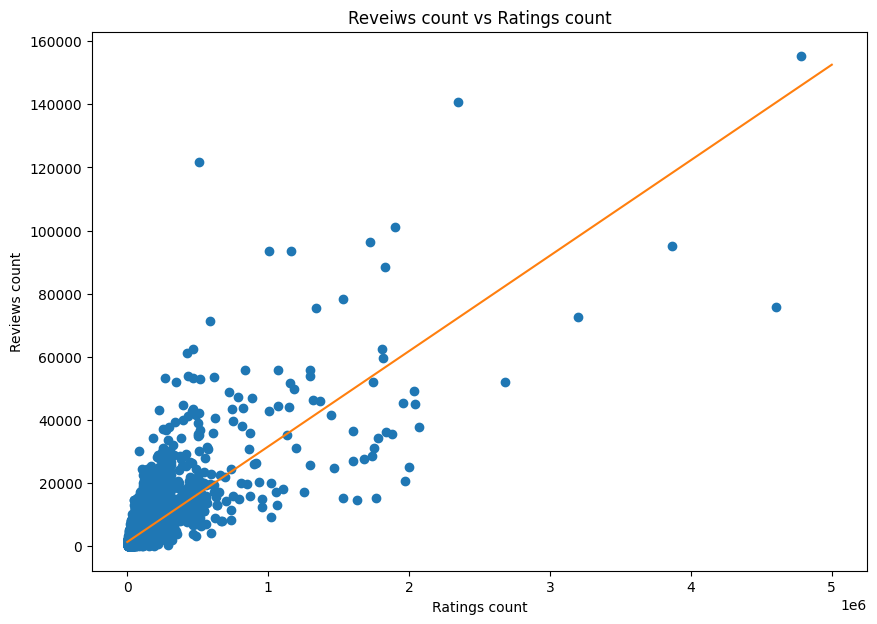

In [ ]:
yr = books['ratings_count']
rat = books['work_text_reviews_count']
d = {}
for i in range(10000):
    if yr[i] < 1700 or yr[i]=='nan' or yr[i]==None:
        continue
    else:
        if yr[i] in d.keys():
            d[yr[i]][0] +=  rat[i]
            d[yr[i]][1] += 1
        else:
            d[yr[i]] = [rat[i],1]
            
            
d3 = {}
for year in d.keys():
    d3[year] = d[year][0]/d[year][1]
d3
plt.figure(figsize=(10,7))
plt.plot(d3.keys(),d3.values(),'o')
# plt.xlabel("Ratings count")
plt.ylabel("Reviews count")
plt.title("Reveiws count vs Ratings count")
plt.xlabel("Ratings count")

# Finding the least square solution : 

M = np.array(list(d3.keys()))
M = M.T
M = np.c_[np.ones((M.size,1)),M] 
p = linalg.lstsq(M,list(d3.values()))[0]
a = p[0]
b = p[1]
xx = np.arange(0,5000000,1)
yy = a + b*xx
plt.plot(xx,yy)
plt.show()